## Final Project Submission

Please fill out:
* Student name: Grace Nekesa 
* Student pace: self paced / part time / full time;Full time
* Scheduled project review date/time: 
* Instructor name: William Okomba
* Blog post URL:


  #We start by understanding and Analyzing our data  from the six datasets that were given.

 #  BUSINESS PROBLEM

Microsoft sees all of the big companies producing original video content and wants in on the action. They've decided to start a new movie studio, but they know nothing about filmmaking. You are tasked with determining which types of films are currently performing well at the box office. You must then translate your findings into actionable insights that the head of Microsoft's new studio can use to help decide what kinds of films to make.

# Data underatanding in bom.movie_gross.csv

#loading the data

In [74]:
# We import the packages
import numpy as np # for the calculations in the data
import seaborn as sns 
#for visualization purposes
import matplotlib.pyplot as plt
%matplotlib inline


In [79]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("data2/bom.movie_gross.csv")
data


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [80]:
#to find duplicated data in the dataset
data.duplicated().value_counts()

False    3387
dtype: int64

In [81]:
data.shape

(3387, 5)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [83]:
#to find the missing values in the dataset
data.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [84]:
#to find the sum of all the missing values
data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [85]:
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [86]:
data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


 # Data cleaning

dropping the column foreign_gross that has a lot of missing data since it has more tha 50% of the missing and data and so we cannot move forward such large numbers of missing data

In [87]:
data.drop("foreign_gross",axis = 1, inplace=True )
 

In [88]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


The row with missing value foreign gross has been eliminated

In [89]:
 # to get information about the data after dropping the row with missing values
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


There are also few null data in the domestic_gross.A better way is by replacing it with the median since it has categorical values and  does not affect the distribution.we can not drop the whole column

In [90]:
data['domestic_gross'].fillna(data['domestic_gross'].median(), inplace = True)

In [91]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


lets replace the missing values in the studio column with the mode

In [92]:
mode_studio = data["studio"].mode()
data["studio"].fillna(mode_studio,inplace = True)

In [93]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


the data is now clean and ready for analysis

# ANALYSIS

In [94]:
studio_data = data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)

In [95]:
top_10_studios = studio_data[:10]

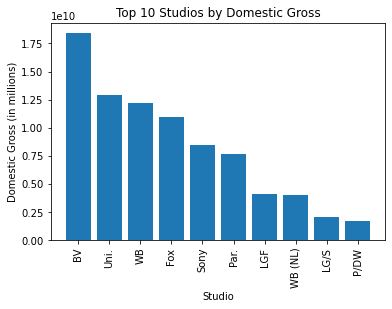

In [96]:

plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()

The graph displays the top 10 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows the name of the studios, and the y-axis shows their domestic gross in millions. The bar chart is easy to read and understand, and the use of color can enhance the presentation.
Based on the graph, it is clear that the Walt Disney Studios Motion Pictures is the top-grossing studio, with a domestic gross of over $11 billion, followed by Warner Bros. Pictures, Universal Pictures, and Sony Pictures Entertainment. The graph also shows that the top 10 studios have a significant lead over the other studios in terms of domestic gross.


Microsoft thus should;
Partner with the top-performing studios:  it may want to consider partnering with the top-performing studios such as Walt Disney Studios Motion Pictures, Warner Bros. Pictures, or Universal Pictures to leverage their success and increase its own revenue.

Invest in the production of popular movie genres: The company can analyze the genres of the top-grossing movies produced by the studios and invest in producing movies in those genres. This strategy can increase the likelihood of the company's success and profitability.

         DATA UNDERSTANDING in im.db dataset

In [30]:
import sqlite3 # this is to import  the SQL database 
conn = sqlite3.connect("data2/im.db")#this is loading the database

In [33]:
#from the sql data base acess the movie basics
im_df = pd.read_sql("""
                    SELECT * FROM
                    movie_basics
                    
                    """,conn)

In [34]:
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [35]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [36]:
im_df.isna().sum()# to find the sum of all the missing values


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [37]:
im_df.describe()#for statistical distributions

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [38]:
 # From the data base in the table access how the movies are being  rated
imdf=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                 ORDER BY numvotes DESC;
                    """,conn)

In [39]:
imdf

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
73851,tt8420530,6.8,5
73852,tt8747790,4.6,5
73853,tt9367004,8.2,5
73854,tt9647642,2.0,5


In [40]:
imdf.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

 there are no missing values and so the data is clean and ready for analysis

lets join the movie_basics table with the movie ratings using movie_id as the primary key and order by the numvotes column in a descending 
manner to give a view of both movie basics and movie ratings

In [41]:
joined_table=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                    JOIN movie_basics
                      USING(movie_id)
                      ORDER BY numvotes DESC;
                    """,conn)

In [42]:
joined_table

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
73851,tt8420530,6.8,5,Tia and Piujuq,Tia and Piujuq,2018,80.0,Family
73852,tt8747790,4.6,5,A Monks Madness,A Monks Madness,2018,NaN,Action
73853,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58.0,Documentary
73854,tt9647642,2.0,5,The Confederate,The Confederate,2018,99.0,History


In [43]:
joined_table.isna().sum()# to find the missing values in the joined table

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [45]:
joined_table.info()#information about the whole table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [46]:
joined_table["genres"].mode()[0]# since there are few missing numbers in genre column, we find the most common and replace it with the missing value so we use mode

'Drama'

we replace the missing values in genre with mode i.e 'drama'

In [47]:
mode_joined_table = joined_table["genres"].mode()[0]

joined_table["genres"].fillna("mode_joined_table",inplace = True)

In [48]:
joined_table.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73856 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


we still have missing values in runtime minutes,we will have to replace the runtime with mean,we will use mean since mean is more efficient in categorical data

In [49]:
mean_joined_table = joined_table["runtime_minutes"].mean()
joined_table["runtime_minutes"].fillna("mean_joined_table",inplace = True)

In [50]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  73856 non-null  object 
 7   genres           73856 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


Both columns have the same number of rows,this means there are no missing values in the joined table

The data is now clean and ready for analysis

# ANALYSIS

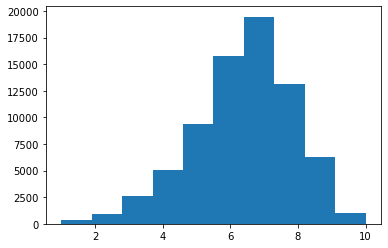

In [51]:
plt.hist(joined_table["averagerating"], bins = 10);

from the histogram we can tell most movies are rated averagely between 6 to 8

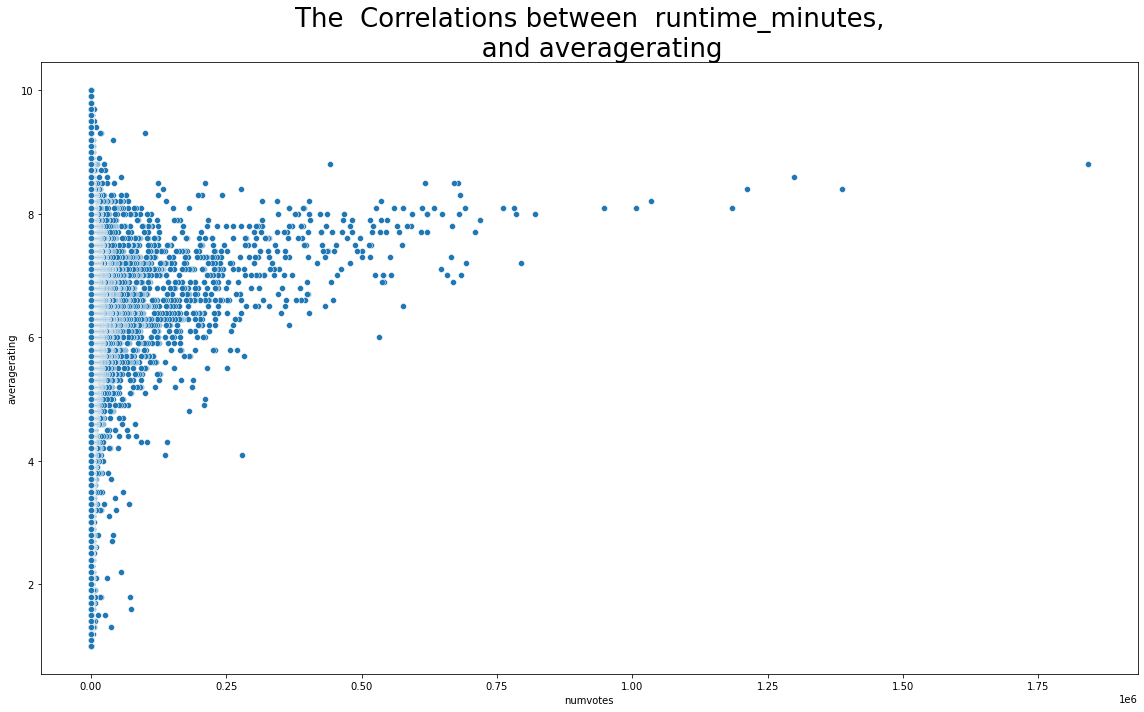

In [53]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='numvotes', y='averagerating', data = joined_table)
plt.title("The  Correlations between  runtime_minutes,\n   and averagerating", fontsize=26)
plt.tight_layout()
plt.show() 


# DATA UNDERSTANDING IN tn.movie_budget.csv

In [54]:
frame = pd.read_csv("data2/tn.movie_budgets.csv")#loading the dataset
frame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Data cleaning

In [55]:
frame.info()#to find all the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


the domestic_gross,worldwide_gross and production_budget are all objects.
We cannot work with currencies as float,we need to convert them to intergers or float.
we will opt to using floats since we are not sure if they are all intergers
 we will to remove the remove dollar signs and commas from Salary column for easy analysis

 

In [56]:
frame['production_budget'] = frame['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
frame['domestic_gross'] = frame['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
frame['worldwide_gross'] = frame['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)



# Verify that the column is now a float data type
print(frame.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


The date is also an object,we have to change it to intergers

In [116]:
frame['release_date'] = pd.to_datetime(frame['release_date'])
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [117]:
frame['year'] = frame['release_date'].dt.year
frame['month'] = frame['release_date'].dt.month
frame['day'] = frame['release_date'].dt.day

#we print the updated dataframe
print(frame)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

In [57]:
frame.head()#to find the first five elements

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


The data set is now clean and ready for analysis

# ANALYSIS


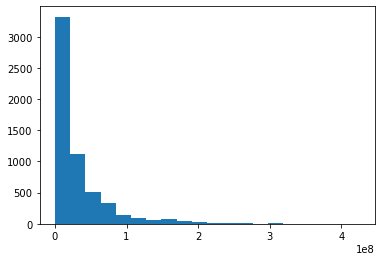

In [58]:
plt.hist(frame['production_budget'],bins = 20);

Distribution of Production Budget: For each movie in the dataset, the histogram displays how much was spent on production. The production budget range is represented by the x-axis, while the frequency of films falling into each range is shown by the y-axis. How many films fall within each production budget range is shown by the histogram.

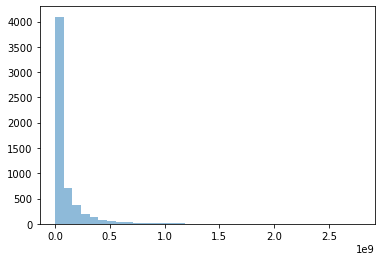

In [59]:
plt.hist(frame['worldwide_gross'],bins = 35 ,density= False , alpha = 0.5);

Worldwide Gross Distribution: The histogram depicts the distribution of worldwide gross for the films in the dataset. The x-axis depicts the range of worldwide gross, while the y-axis depicts the frequency of films that fall into each range. The histogram shows how many films fall into each global gross range.

we find the return on investment ROI of the dataset

In [133]:
#the calculation of the ROI
frame['return_on_inv'] = ((frame['domestic_gross'] + frame['worldwide_gross'] - frame['production_budget']) / frame['production_budget']).round(2)

In [134]:
frame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,7.32
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,2.13
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-0.45
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,4.63
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,5.11
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,12,31,-1.00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,4,2,47.16
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7,13,-0.46
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,9,29,-1.00


In [135]:
movie_budget_sample = frame.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]


In [131]:
movie_budget_sample

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,2009,9,25,670.34
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,1999,7,14,647.07
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,2015,7,10,643.21
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,1993,2,26,582.26
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,1980,3,21,541.50
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,2004,5,7,518.43
5346,47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,1942,8,13,431.16
5715,16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,1995,8,9,416.06
5665,66,1974-10-18,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,1974,10,18,378.61
5676,77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,1968,10,1,368.95


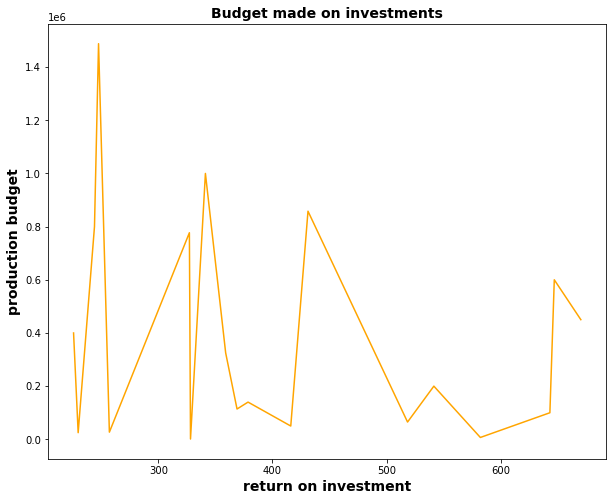

In [137]:
#ploting the graph of the ROI
x = movie_budget_sample["return_on_inv"]
y = movie_budget_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

Although there is a positive correlation between production budget and worldwide gross, it is important to evaluate the return on investment (ROI) of a movie. microsoft may want to analyze the profitability of their movies by comparing the production budget to the worldwide gross and factoring in other expenses such as marketing and distribution costs.


  # correlation

In [ ]:
frame["production_budget"].corr(frame["domestic_gross"])#relation between production_budget and domestic_gross


0.6856818396752733

In [ ]:
#the relationship between production_budget and worldwide_gross
frame["production_budget"].corr(frame["worldwide_gross"])

0.7483059765694753

In [ ]:
#The correlation in percentage for production budget and domesticgross
correlation_pr_dm = round(frame['production_budget'].corr(frame['domestic_gross']),4)*100
print("The correlation between production budget and domestic revenue is :", correlation_pr_dm,"%")

The correlation between production budget and domestic revenue is : 68.57 %


In [ ]:
#the correlation in percentage between production budget and worlwide gross
correlation_pr_ww = round(frame['production_budget'].corr(frame['worldwide_gross']), 4)*100
print("The correlation between production budget and worldwide revenue is :", correlation_pr_ww, "%")

The correlation between production budget and worldwide revenue is : 74.83 %


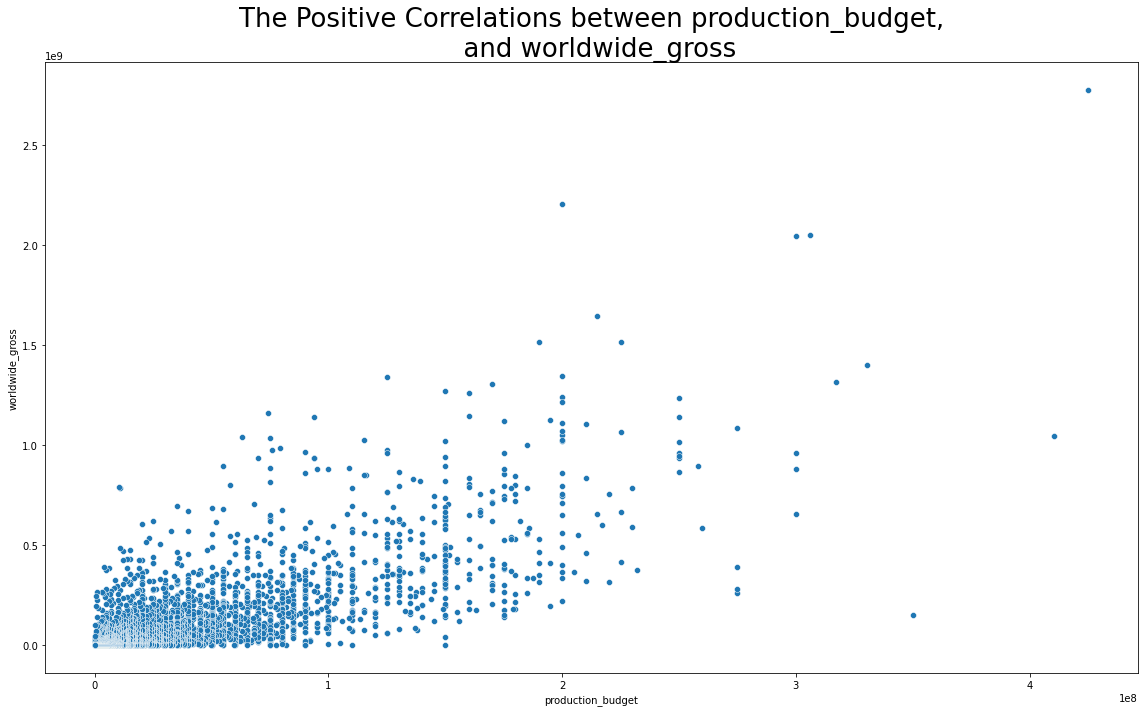

In [ ]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = frame,)
plt.title("The Positive Correlations between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show() 


The graph shows a scatterplot of the production budget on the x-axis and worldwide gross on the y-axis, with each data point representing a movie. Here are some recommendations based on the plot:
1.There is a positive correlation between the production budget and worldwide gross: The scatterplot shows a general trend where movies with higher production budgets tend to have higher worldwide gross. Therefore, Microsoft company may want to consider increasing their production budget to increase their chances of higher worldwide gross.


From the correlation, microsoft should consider Expanding to international markets:  it's worth noting that the top studios are also successful in international markets. Therefore, the company can consider expanding to international markets to increase revenue and compete with the top studios.

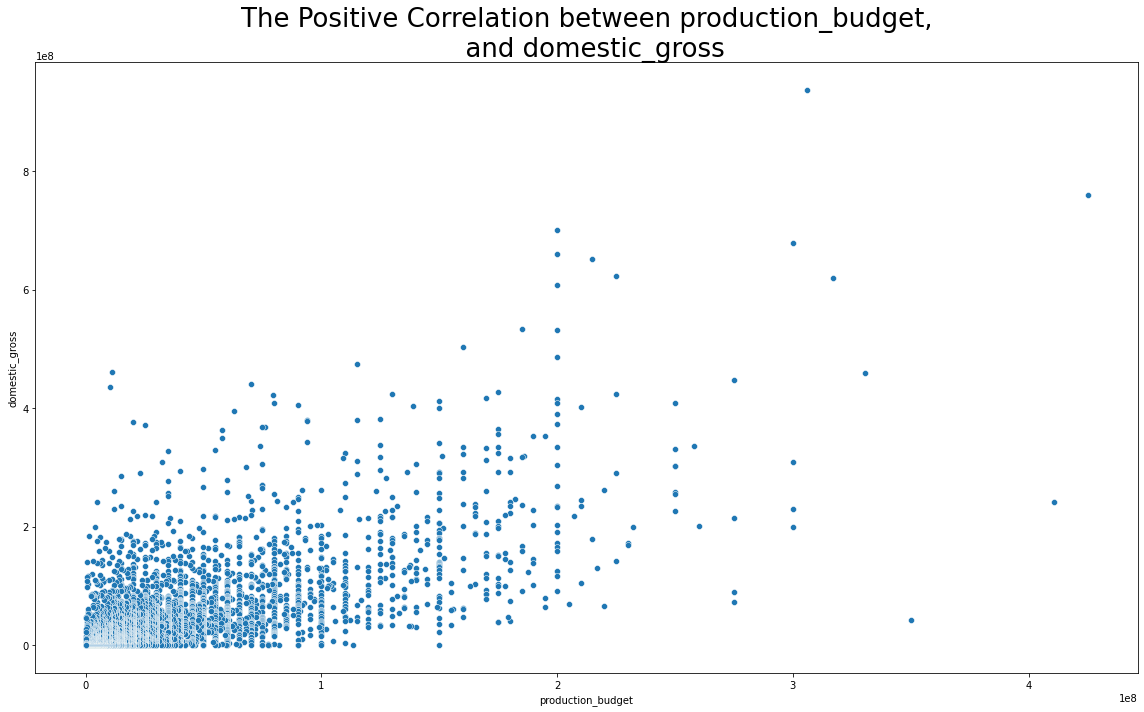

In [97]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = frame,)
plt.title("The Positive Correlation between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show() 

There is a positive correlation between the production budget and domestic gross: The scatterplot shows a general trend where movies with higher production budgets tend to have higher domestic gross. Therefore, microsoft may want to consider increasing their production budget to increase their chances of higher domestic gross.

## DATACLEANING IN rt.movie_info NOT NECESSARY

In [ ]:
movie_info = pd.read_csv("data2/rt.movie_info.tsv",delimiter ="\t" )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
movie_info.info()#to find information about  the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
movie_info.isna().any()#to find if there are any missing values

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [ ]:
movie_info.isna().sum()#to find the sum of missing values

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [ ]:
#We drop currency, box_office, studio columns since there are lots of missing values
movie_info.drop(['currency','box_office','studio'], axis=1, inplace=True)
movie_info.isna().sum()


id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [ ]:
movie_info['runtime'].value_counts().head()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
movie_info_df = movie_info[["rating","genre","runtime"]]
movie_info_df

,rating,genre,runtime
0,R,Action and Adventure|Classics|Drama,104 minutes
1,R,Drama|Science Fiction and Fantasy,108 minutes
2,R,Drama|Musical and Performing Arts,116 minutes
3,R,Drama|Mystery and Suspense,128 minutes
4,NR,Drama|Romance,200 minutes
...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes
1556,PG,Comedy|Science Fiction and Fantasy,88 minutes
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes


In [ ]:
mode_rating = movie_info["rating"].mode()[0]
movie_info['rating'].fillna(mode_rating, inplace = True)
movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
mode_genre = movie_info["genre"].mode()[0]
movie_info['genre'].fillna(mode_genre, inplace = True)
movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
mode_runtime = movie_info["runtime"].mode()[0]


#Count the top 10 most common categorical data in the other columns


In [ ]:
top_10 = movie_info['runtime'].value_counts()
print(top_10)

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
240 minutes     1
290 minutes     1
54 minutes      1
170 minutes     1
205 minutes     1
Name: runtime, Length: 142, dtype: int64


# DATA UNDERSTANDING IN tmdb.movies.csv
    

In [60]:
tmdb_movie = pd.read_csv('data2/tmdb.movies.csv',index_col = 0)
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [61]:
tmdb_movie.shape #to find the number of rows and columns

(26517, 9)

In [63]:
tmdb_movie.info()# to get information about the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [65]:
tmdb_movie.describe()#to get a numerical distribution of the dataset

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [66]:
tmdb_movie.isna().sum()# to find the misssing values in the dataset

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# Data cleaning

There are no missing values in the data set,lets find if there atre duplicated values

In [67]:
tmdb_movie.duplicated().value_counts()#to find the sum of duplicated values

False    25497
True      1020
dtype: int64

 we find some true 1020 of duplicated values ,we have to drop them

In [ ]:
tmdb_movie.drop_duplicates(keep = 'first',inplace = True)

tmdb_movie.shape the shape now changes from(26515 rows to 25497 rows)

In [ ]:
tmdb_movie["popularity"].sort_values(ascending=False)#to find the popularity of movies using their id

23811    80.773
11019    78.123
23812    60.534
11020    53.783
5179     50.289
          ...  
14110     0.600
14109     0.600
14108     0.600
14107     0.600
26516     0.600
Name: popularity, Length: 25497, dtype: float64

In [ ]:
tmdb_movie["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

# ANALYSIS

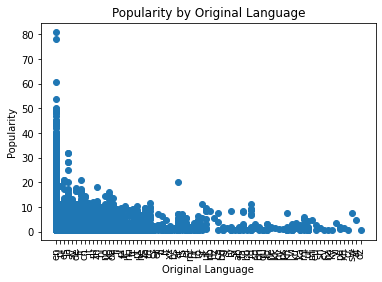

In [100]:



plt.scatter(tmdb_movie['original_language'], tmdb_movie['popularity'])

plt.title('Popularity by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Popularity')

plt.xticks(rotation=90)

plt.show()


The most popular original language for films is English, followed by Chinese and Japanese. If a film production company wishes to increase the popularity of its films, it may consider producing more films in these languages.

If, on the other hand, a microsoft production company wishes to target a specific audience or region, it may consider producing films in the languages spoken in that area.

It is important to note that other factors such as genre, release date, and marketing efforts may have an impact on average popularity by language. As a result, when planning movie production and marketing strategies, it is critical to consider these factors in addition to language.

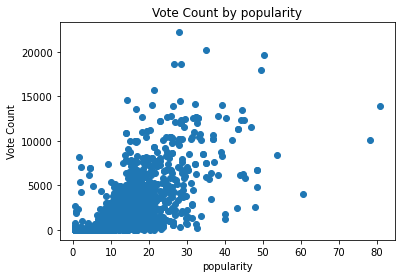

In [106]:

# Plot a scatter plot between genre id and vote count
plt.scatter(tmdb_movie['popularity'],tmdb_movie['vote_count'])

# Set the title and axis labels
plt.title('Vote Count by popularity')
plt.xlabel('popularity')
plt.ylabel('Vote Count')

# Show the plot
plt.show()

There appears to be a positive correlation between popularity and vote count. As popularity increases, so does the vote count

# RECOMENDATIONS

Invest in the production of popular movie genres: The company can analyze the genres of the top-grossing movies produced by the studios and invest in producing movies in those genres. This strategy can increase the likelihood of the company's success and profitability.

Expand to international markets:  it's worth noting that the top studios are also successful in international markets. Therefore, the company can consider expanding to international markets to increase revenue and compete with the top studios.

 Microsoft should consider Partnering with the top-performing studios: it may want to consider partnering with the top-performing studios such as Walt Disney Studios Motion Pictures, Warner Bros. Pictures, or Universal Pictures to leverage their success and increase its own revenue.

In [ ]:
      #DATA CLEANING IN rt.reviws.tsv   #not needed

In [ ]:
movie_reviews = pd.read_csv("Data2/rt.reviews.tsv",delimiter='\t', encoding = 'latin-1')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [ ]:
movie_reviews